# **Exercise 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

# **Task 1**  
Plot various realisations of signal plus noise. Use different signal amplitudes with generate_source until you can not distinguish the signal because it is too faint.

In [37]:
"""
Usage: ./generate_source  [-h] [-o <file>] [-s <float>] [-d <float>] [-N <int>] [-f <float>] [-p <float>]
                          [-a <float>] [-r <int>]
  -o, --output=<file>       output file
  -s, --sigma=<float>       standard deviation sigma
  -d, --deltaT=<float>      delta T betwean measurements
  -N, --length=<int>        number of elements
  -f, --freq=<float>        frequency
  -p, --phase=<float>       phase
  -a, --amplitude=<float>   signal amplitude
  -r, --random=<int>        if set to 1, generate random signal
  -h, --help                print this help and exit
"""      

def generate_source(outputFile=None, sigma=0, f=10, A=1, delta_T=None, N=10000, phi=0, r=0):
    if delta_T == None : 
        delta_T = 1/N
           
    cmd_str = f"./generate_source -o {outputFile} -s {sigma} "\
        f"-d {delta_T} -N {N} -f {f} -p {phi} -a {A} -r {r}"
    
    print(cmd_str)
    
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        print('The process has an output:', out.decode())

    return

In [81]:
def plot_data(filename, title=None):       
    data = np.loadtxt(filename)
    plt.plot(data[:,0],data[:,1])
    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    if (title):
        plt.title(title, fontsize=15)
    plt.savefig(filename.replace('.csv', '.jpg'))
    plt.show()
    plt.close()

./generate_source -o data_01.csv -s 0.0 -d 0.0001 -N 10000 -f 10 -p 0 -a 1 -r 0


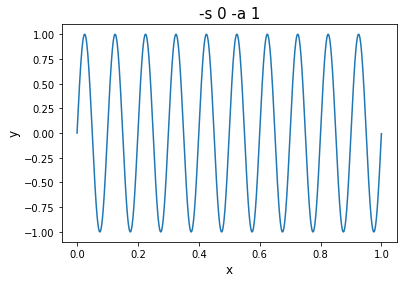

./generate_source -o data_02.csv -s 0.5 -d 0.0001 -N 10000 -f 10 -p 0 -a 1 -r 0


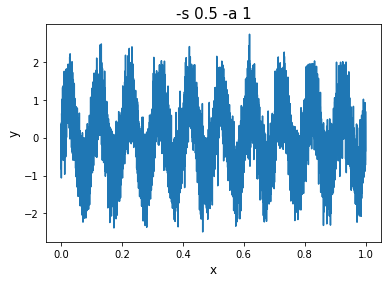

./generate_source -o data_03.csv -s 5 -d 0.0001 -N 10000 -f 10 -p 0 -a 1 -r 0


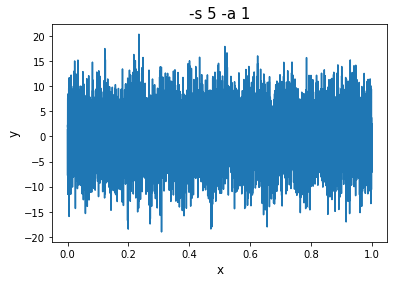

./generate_source -o data_04.csv -s 10 -d 0.0001 -N 10000 -f 10 -p 0 -a 1 -r 0


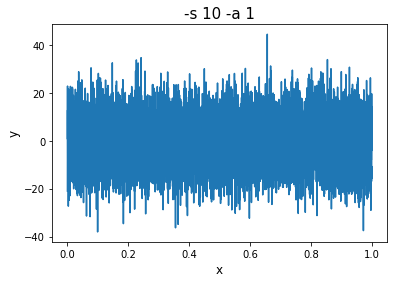

./generate_source -o data_05.csv -s 10 -d 0.0001 -N 10000 -f 10 -p 0 -a 0 -r 0


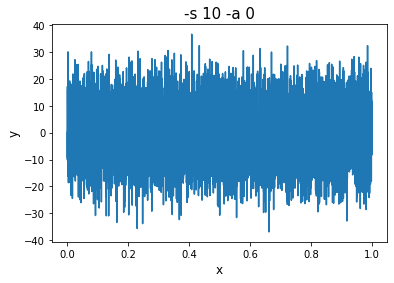

In [82]:
data_set = {
    1: {
        'sigma': 0.0,
        'A': 1,
        'f': 10,
        'filename': "data_01.csv",
        'title': "-s 0 -a 1",
    },
    2: {
        'sigma': 0.5,
        'A': 1,
        'f': 10,
        'filename': "data_02.csv",
        'title': "-s 0.5 -a 1",
    },
    3: {
        'sigma': 5,
        'A': 1,
        'f': 10,
        'filename': "data_03.csv",
        'title': "-s 5 -a 1",
    },
    4: {
        'sigma': 10,
        'A': 1,
        'f': 10,
        'filename': "data_04.csv",
        'title': "-s 10 -a 1",
    },
    5 : {
        'sigma': 10,
        'A': 0,
        'f': 10,
        'filename': "data_05.csv",
        'title': "-s 10 -a 0",
    }
}

for key, value in data_set.items():
    generate_source(value.get('filename'), sigma=value.get('sigma'), A=value.get('A'), f=value.get('f'))
    plot_data(value.get('filename'), title=value.get('title'))

# **Task 2**
Learn to use prober, our small black box program computing a scalar result based upon input
time series and parameter point (f, φ).

In [6]:
"""
Usage: ./prober  [-h] [-i <file>] [-o <file>] [-f <float>] [-p <float>] [-t <file>] [-m <int>]
  -i, --input=<file>        input file
  -o, --output=<file>       output file
  -f, --freq=<float>        frequency
  -p, --phase=<float>       phase
  -h, --help                print this help and exit
  -t, --templatebank=<file> template bank file
  -m, --method=<int>        select method to analyze signal 1, 2 or 3
"""

def prober(inputFile, f=0, outputFile=None, phi=0, templateFile=None, mod=0):
    
    cmd_str = f"./prober -i {inputFile} "\
        f"-o {outputFile} -m {mod}"
    if templateFile:
        cmd_str += f" -t {templateFile} "
    else:
        cmd_str += f" -f {f} -p {phi}"
        
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        print('The process has an output:', out.decode())
    
    return

In [28]:
prober("data_01.csv", f=10, mod=1)

The process has an output: 10 0 0.5



# **Task 3**
Learn how prober results change, varying the parameters of an injected signal while probing
the same parameter point

In [29]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, mod=1)

The process has an output: 10 0 0.5

The process has an output: 10 0 0.502298

The process has an output: 10 0 0.528118

The process has an output: 10 0 0.549997

The process has an output: 10 0 0.0774871



In [30]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, mod=2)

The process has an output: 10 0 3.34998e-13

The process has an output: 10 0 0.0609817

The process has an output: 10 0 4.07576

The process has an output: 10 0 99.2109

The process has an output: 10 0 98.9823



# ** Task 4**
Plot/document result findings: how large may the mismatch between injection and probe
parameter may become? What happens with weak signals (small amplitude)?

In [ ]:
#creating a template_bank 
n = 50
freq = np.linspace(0.01, 100.0, n)
with open("temp_bank", "w") as file:
    for i in range(n):
        file.write("{0} {1}\n".format(freq[i],0))

(0.01, 100.0)

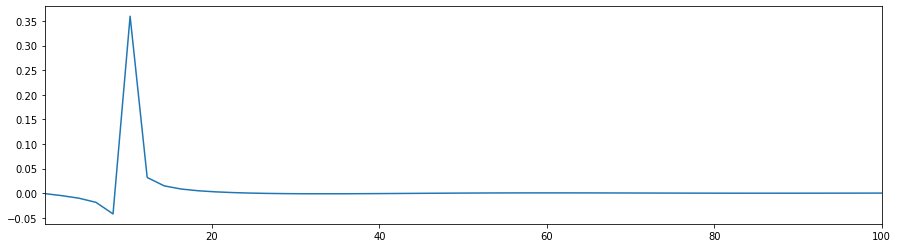

In [66]:
prober("data_01.csv", f=10, outputFile="results", templateFile="temp_bank", mod=1)


results_file = np.loadtxt("results")
plt.figure(figsize=(15,4))
plt.plot(results_file[:,0],results_file[:,2])
plt.xlim([0.01,100.0])

# **Task 5**
Develop an strategy to find signal with prober if the signal parameters (A, f, φ) are unknown.

In [71]:
generate_source("data_07.csv", sigma=0, r=1)

./generate_source -o data_07.csv -s 0 -d 0.0001 -N 10000 -f 10 -p 0 -a 1 -r 1
The process has an output: 61.654449
0.386797



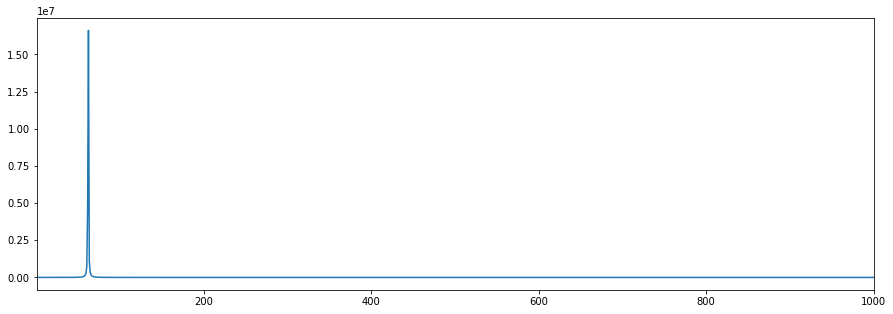

In [74]:
n = 50
freq = np.linspace(0.01, 1000.0, n)
with open("temp_bank1", "w") as file:
    for i in range(n):
        file.write("{0} {1}\n".format(freq[i],0))
        
prober("data_07.csv", outputFile="results1", templateFile="temp_bank1", mod=3)

results_file = np.loadtxt("results1")
plt.figure(figsize=(15,5))
plt.plot(results_file[:,0],results_file[:,2])
plt.xlim([0.01,1000.0])
plt.savefig("data_07.jpg")
plt.show()
plt.close()